In [17]:
import os  
import keras
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Flatten, Dense , Dropout , BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [18]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

<font size ='5'>Creating 3 important Lists--
 1. data list , for storing image data in numpy array form
 2. paths list , for storing paths of all images
 3. result list , for storing One Hot Encoded form of target class whether normal or tumor

In [19]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'C:\Users\Ayush\Desktop\Atharva Documents\1.Python_project\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [20]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r'C:\Users\Ayush\Desktop\Atharva Documents\1.Python_project\no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [21]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [22]:
result = np.array(result)
result = result.reshape(139,2)

<font size ='5'>Splitting the Data into Training & Testing

In [23]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)


<font size ='5'> Model Building

In [24]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Batc  (None, 128, 128, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [25]:
y_train.shape


(111, 2)

In [26]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 8s 3s/step - loss: 33.7956 - val_loss: 51.7293
Epoch 2/30
3/3 [==============================] - 5s 1s/step - loss: 15.7555 - val_loss: 4.7428
Epoch 3/30
3/3 [==============================] - 7s 3s/step - loss: 4.0949 - val_loss: 6.4045
Epoch 4/30
3/3 [==============================] - 10s 4s/step - loss: 3.6594 - val_loss: 8.4000
Epoch 5/30
3/3 [==============================] - 9s 3s/step - loss: 1.8036 - val_loss: 5.6335
Epoch 6/30
3/3 [==============================] - 9s 3s/step - loss: 1.0646 - val_loss: 3.8081
Epoch 7/30
3/3 [==============================] - 9s 3s/step - loss: 0.7204 - val_loss: 4.1717
Epoch 8/30
3/3 [==============================] - 8s 3s/step - loss: 0.4290 - val_loss: 5.5606
Epoch 9/30
3/3 [==============================] - 6s 2s/step - loss: 0.2829 - val_loss: 5.3300
Epoch 10/30
3/3 [==============================] - 7s 2s/step - loss: 0.3848 - val_loss: 3.5866
Epoch 11/30
3/3 [============================

<font size ='5'> Plotting Losses

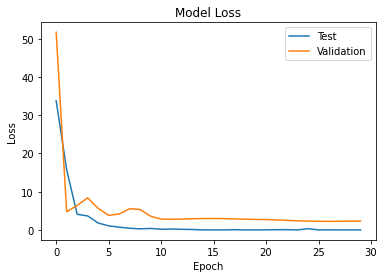

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

<font size ='5'> Model Verification

In [28]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


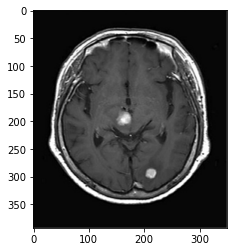

In [34]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Ayush\Desktop\Atharva Documents\1.Python_project\no\N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


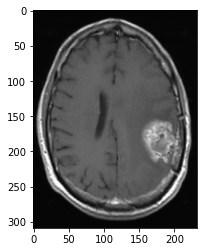

In [36]:
from matplotlib.pyplot import imshow
img = Image.open(r"C:\Users\Ayush\Desktop\Atharva Documents\1.Python_project\yes\Y157.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))